### IMPLEMENT ITERATIVE PROPORTIONAL FITTING (IPF) USING CLASS IPF FROM IPF_GENERATOR

##### IMPORT LIBRARIES AND MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from ipf_generator import *
from helpers import *
from mc_generator import *

#### Let us generate synthetic data from two dimensions, age with three age groups (0-17,18-64,64+), and Sex (Male and Female).

##### Target counts, age = 0-17 -> 60, 18-64 -> 30, and 65+ -> 10, and 
##### Target counts, sex = Male -> 40 and female ->60

In [2]:
age = {'0–17': 60, '18–64': 30, '65+': 10}
sex = {'Male': 40, 'Female': 60}

### FIT MODEL

In [3]:
ipf_model = IPF(age, sex)
fitted_matrix = ipf_model.fit()


Matrix converged on 5 iterations


In [4]:
# Visualize the final converged matrix
print(f"Final fitted matrix:\n{np.round(fitted_matrix,2)}")

Final fitted matrix:
[[18.95 41.05]
 [16.9  13.1 ]
 [ 4.15  5.85]]


### GENERATE SAMPLES

In [5]:
samples = ipf_model.generate(n_samples=1000)
df = pd.DataFrame(samples, columns=['Age_group','Sex','Age'])
df.head()



,Age_group,Sex,Age
0,18–64,Female,34
1,0–17,Female,0
2,18–64,Female,21
3,18–64,Male,47
4,0–17,Male,9


In [6]:
# plt.hist(df['Age'])
# df['Age'].max()
df['Age'].mean

<bound method Series.mean of 0      34
1       0
2      21
3      47
4       9
       ..
995     1
996    42
997    14
998    88
999    14
Name: Age, Length: 1000, dtype: object>

### VALIDATION

##### Compare Distribution between target and samples

In [7]:
sample_age_dist = df['Age_group'].value_counts(normalize=True)
sample_Sex_dist = df['Sex'].value_counts(normalize=True)
sample_age_dist, sample_Sex_dist


(Age_group
 0–17     0.603
 18–64    0.299
 65+      0.098
 Name: proportion, dtype: float64,
 Sex
 Female    0.59
 Male      0.41
 Name: proportion, dtype: float64)

##### Plot distributions to visualize the match

In [8]:
# target_age = list(age.values())
# target_sex = list(sex.values())

order = ['Male', 'Female']
sample_Sex_dist = sample_Sex_dist.reindex(order)
# Convert input marginals to distributions
total = sum(age.values())
target_age = pd.Series(age) / total
target_sex = pd.Series(sex) / total


In [9]:
target_sex, sample_Sex_dist

(Male      0.4
 Female    0.6
 dtype: float64,
 Sex
 Male      0.41
 Female    0.59
 Name: proportion, dtype: float64)

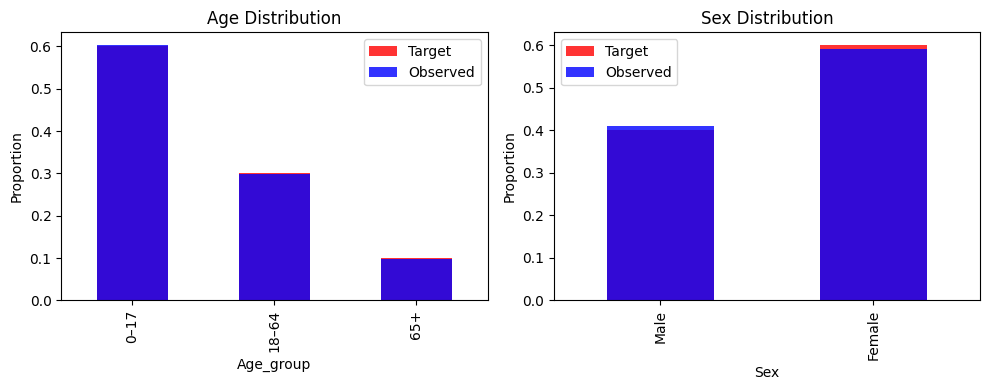

In [10]:
plot_dist(target_age, target_sex, sample_age_dist, sample_Sex_dist)

##### KL-Divergence

In [11]:
kl_div(target_age, target_sex, sample_age_dist, sample_Sex_dist)

KL divergence (age): 0.0000
KL divergence (sex): 0.0002
Good match


$\chi ^2$ test

In [12]:
chi_square_test(target_age, sample_age_dist, verbose=True)


No significant difference (p = 1.0000) — Good match.


### MONTE CARLO SIMULATION

In [13]:
age_dist = {'0-17': 60, '18-64': 30, '65+': 10}
sex_dist = {'M': 40, 'F': 60}

gen = mc_generator_(age=age_dist, sex=sex_dist)
synthetic_data = gen.generate_samples(n_samples=1000)

print(synthetic_data)


[['18-64' '35' 'F']
 ['0-17' '12' 'M']
 ['0-17' '2' 'F']
 ...
 ['65+' '68' 'F']
 ['0-17' '10' 'F']
 ['18-64' '20' 'M']]


In [14]:
df_mc = pd.DataFrame(synthetic_data, columns = ['age_group','age','sex'])
sample_age_mc = df_mc['age_group'].value_counts(normalize=True)
sample_sex_mc = df_mc['sex'].value_counts(normalize=True)
sample_age_dist, sample_sex_mc

# target_age, target_sex

(Age_group
 0–17     0.603
 18–64    0.299
 65+      0.098
 Name: proportion, dtype: float64,
 sex
 F    0.605
 M    0.395
 Name: proportion, dtype: float64)

In [15]:
order = ['M', 'F']
sample_sex_mc = sample_sex_mc.reindex(order)
sample_sex_mc

sex
M    0.395
F    0.605
Name: proportion, dtype: float64

### PLOT

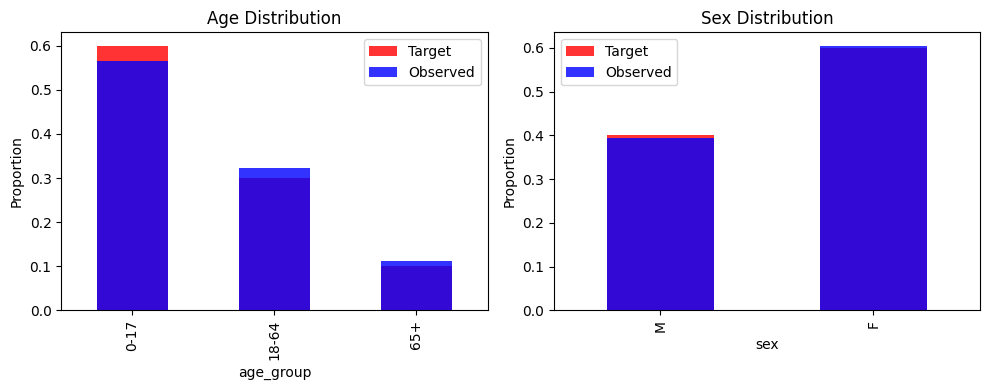

In [16]:

# Convert input marginals to distributions
total = sum(age_dist.values())
target_age = pd.Series(age_dist) / total
target_sex = pd.Series(sex_dist) / total
plot_dist(target_age, target_sex, sample_age_mc, sample_sex_mc)

### KL DIVERGENCE

In [17]:
kl_div(target_age, target_sex, sample_age_mc, sample_sex_mc)


KL divergence (age): 0.0027
KL divergence (sex): 0.0001
Good match


### $\chi^2 $ test

In [18]:
chi_square_test(target_age, sample_age_mc, verbose=True)
chi_square_test(target_sex, sample_sex_mc, verbose=True)



No significant difference (p = 0.9973) — Good match.
No significant difference (p = 0.9918) — Good match.


In [20]:
df.to_csv('../data/synth_pop_0.csv')